#                                                      Importing Modules

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import joblib

# Reading and exploring the data

In [25]:
df=pd.read_csv('Cars.csv')
df.info()
df.describe()
print('*'*50)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    14741 non-null  int64  
 1   Brand         14741 non-null  object 
 2   Model         14741 non-null  object 
 3   Body          14741 non-null  object 
 4   Color         14741 non-null  object 
 5   Year          14741 non-null  int64  
 6   Fuel          14741 non-null  object 
 7   Kilometers    14741 non-null  object 
 8   Engine        14741 non-null  object 
 9   Transmission  14741 non-null  object 
 10  Price         14741 non-null  float64
 11  Gov           14741 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.3+ MB
**************************************************


,Unnamed: 0,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,5337,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,5338,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,5339,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,5340,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,5341,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza


# EDA

In [26]:
#Converting car year to age to see how old the car is:
df['this_year']= 2022
df['car_age']=df['this_year']-df['Year']
#Combining car Model with brand as these are for the same car:
df['carModelBrand']=df['Brand']+" "+df['Model']

In [27]:
#Getting Unique and NULL Values 
print(df['carModelBrand'].unique())
print(df['Body'].unique())
print(df['car_age'].unique())
print(df['Fuel'].unique())
print(df['Color'].unique())
print(df['Kilometers'].unique())
print(df['Engine'].unique())
print(df['Transmission'].unique())
print(df['Gov'].unique())

df.isnull().sum()

['Hyundai Accent' 'Hyundai Avante' 'Hyundai I10' 'Hyundai Elantra'
 'Hyundai Excel' 'Hyundai Matrix' 'Hyundai Tucson' 'Hyundai Verna'
 'Chevrolet Cruze' 'Chevrolet Aveo' 'Chevrolet Lanos' 'Chevrolet Optra'
 'Fiat 128' 'Fiat 131' 'Fiat Punto' 'Fiat Shahin' 'Fiat Tipo' 'Fiat Uno']
['Sedan' 'Hatchback' 'SUV']
[15 17 23 13 22 10 12 16  7  5 21 11 26 14  2  9  3  8  6  0 24 20  1 18
 19 28 25 27  4 29 30 32 46 35 31 37 45 44 34 43 47 40 39 48 42 33 38 41
 49 36 50 51 52]
['Benzine' 'Natural Gas']
['Black' 'Silver' 'Gray' 'Blue- Navy Blue' 'Green' 'Red' 'Gold'
 'Other Color' 'Burgundy' 'White' 'Yellow' 'Brown' 'Orange' 'Beige']
['140000 to 159999' '180000 to 199999' '10000 to 19999' 'More than 200000'
 '90000 to 99999' '100000 to 119999' '160000 to 179999' '120000 to 139999'
 '0 to 9999' '20000 to 29999' '30000 to 39999' '80000 to 89999'
 '60000 to 69999' '70000 to 79999' '40000 to 49999' '50000 to 59999']
['1600 CC' '1000 - 1300 CC' '1400 - 1500 CC']
['Automatic' 'Manual']
['Giza' 'Qena' 'C

Unnamed: 0       0
Brand            0
Model            0
Body             0
Color            0
Year             0
Fuel             0
Kilometers       0
Engine           0
Transmission     0
Price            0
Gov              0
this_year        0
car_age          0
carModelBrand    0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='carModelBrand'>

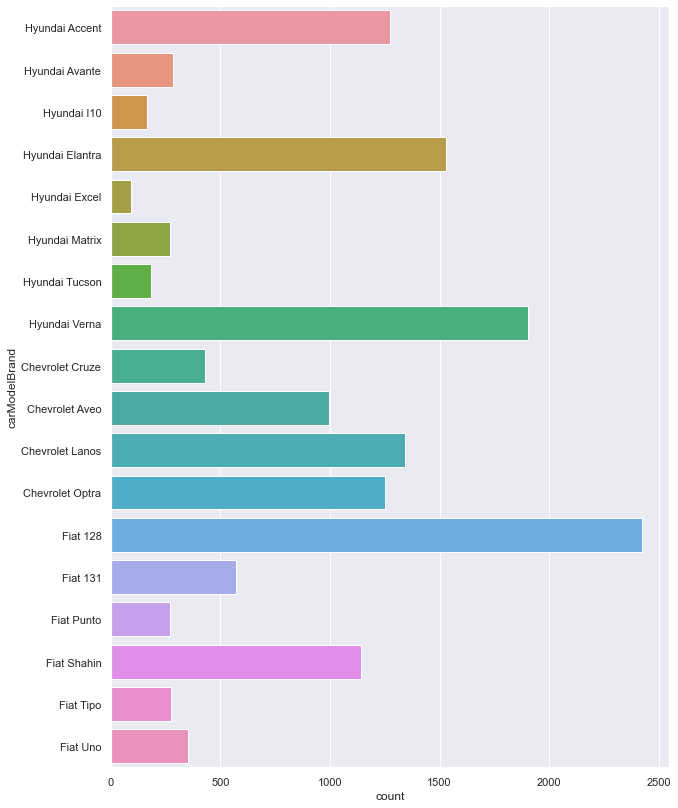

In [28]:
plt.figure(figsize=(10,14))
sns.countplot(y = df["carModelBrand"])

<AxesSubplot:xlabel='count', ylabel='Gov'>

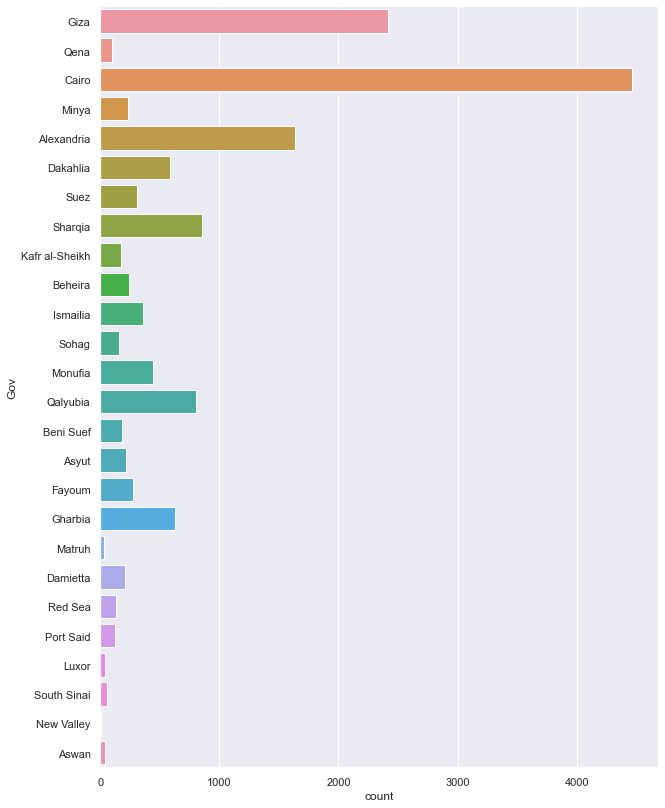

In [29]:
plt.figure(figsize=(10,14))
sns.countplot(y = df["Gov"])

<AxesSubplot:xlabel='Model', ylabel='Price'>

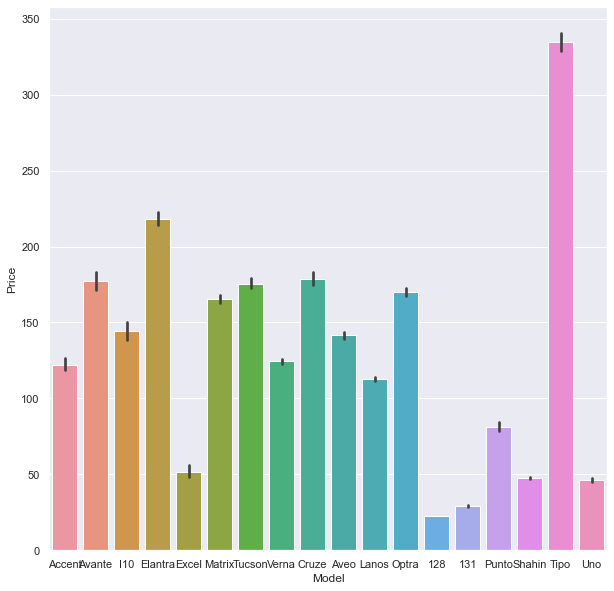

In [30]:
sns.barplot(x = df["Model"], y = df["Price"])

<AxesSubplot:xlabel='Color', ylabel='Price'>

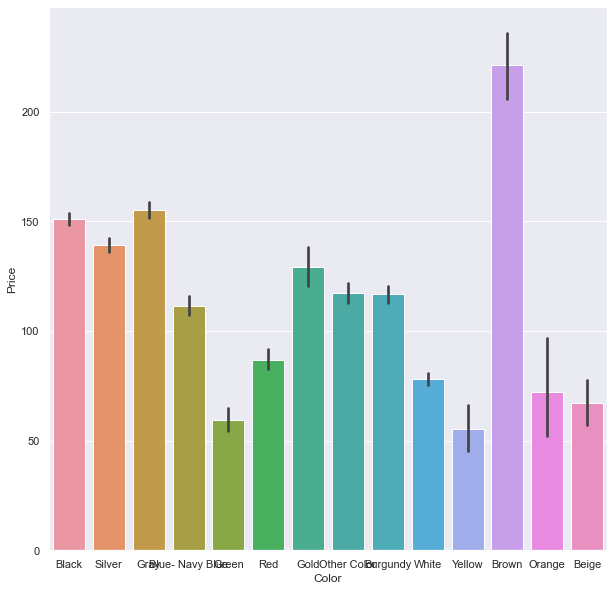

In [31]:
sns.barplot(x = df["Color"], y = df["Price"])

# Feature Engineering

In [32]:
#Important Transforming functions
size_map_type ={'Hyundai Accent':0,'Hyundai Avante':1,'Hyundai I10':2,'Hyundai Elantra':3,'Hyundai Excel':4,'Hyundai Matrix':5,'Hyundai Tucson':6,'Hyundai Verna':7,'Chevrolet Cruze':8,'Chevrolet Aveo':9,'Chevrolet Lanos':10,'Chevrolet Optra':11,'Fiat 128':12,'Fiat 131':13,'Fiat Punto':14,'Fiat Shahin':15,'Fiat Tipo':16,'Fiat Uno':17}
size_map_engine = {'1600 CC':1600, '1000 - 1300 CC':1300, '1400 - 1500 CC':1500 }
size_map_transmission={'Automatic':1,'Manual':0}
size_map_fuel={'Benzine':0 ,'Natural Gas':1}
size_map_color={'White' : 0,'Black' : 1, 'Silver' : 2,'Gray' : 3,'Red' : 4,'Blue- Navy Blue' : 5,'Other Color' : 6,'Burgundy' : 7,'Green' : 8,'Gold' : 9,'Beige' : 10,'Brown' : 11,'Yellow' : 12,'Orange' :13}
size_map_body={'Sedan':0 ,'Hatchback':1,'SUV':2}
size_map_km={'140000 to 159999':159999, '180000 to 199999':199999, '10000 to 19999':19999, 'More than 200000':200000,'90000 to 99999':99999, '100000 to 119999':119999 ,'160000 to 179999':179999,'120000 to 139999':139999,'0 to 9999':9999, '20000 to 29999':29999, '30000 to 39999':39999, '80000 to 89999':89999,'60000 to 69999':69999,'70000 to 79999':79999, '40000 to 49999':49999, '50000 to 59999':59999}
df['Engine'] = df['Engine'].map(size_map_engine)
df['Transmission'] = df['Transmission'].map(size_map_transmission)
df['Kilometers'] = df['Kilometers'].map(size_map_km)
df['Body'] = df['Body'].map(size_map_body)
df['Color'] = df['Color'].map(size_map_color)
df['Fuel'] = df['Fuel'].map(size_map_fuel)
df['carModelBrand']=df['carModelBrand'].map(size_map_type)


In [33]:
#Dropping non important columns and transform categorical data to binary:
df.drop(columns=['Unnamed: 0','this_year','Year','Brand','Model','Gov'], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Body           14741 non-null  int64  
 1   Color          14741 non-null  int64  
 2   Fuel           14741 non-null  int64  
 3   Kilometers     14741 non-null  int64  
 4   Engine         14741 non-null  int64  
 5   Transmission   14741 non-null  int64  
 6   Price          14741 non-null  float64
 7   car_age        14741 non-null  int64  
 8   carModelBrand  14741 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 1.0 MB


<AxesSubplot:>

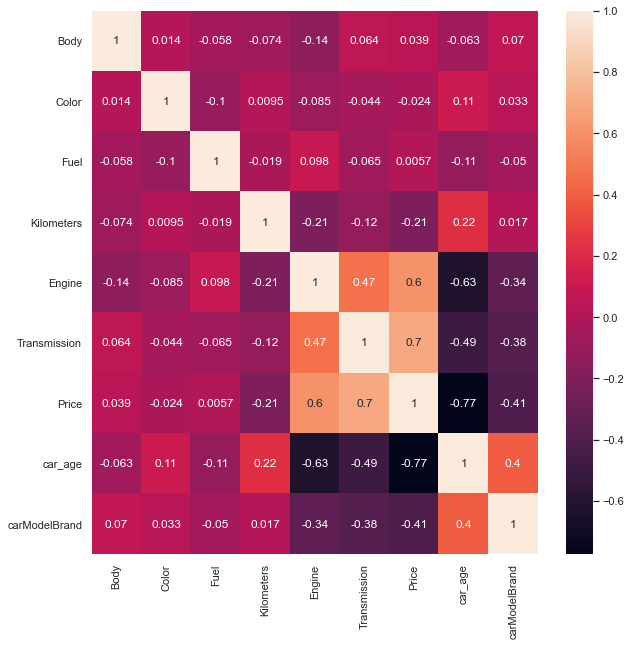

In [35]:
corr=df.corr(method ='pearson')
sns.heatmap(corr,annot=True)

# Splitting The data

In [36]:
x=df.drop('Price',axis=1)
y=df['Price']

In [37]:
x

,Body,Color,Fuel,Kilometers,Engine,Transmission,car_age,carModelBrand
0,0,1,0,159999,1600,1,15,0
1,0,2,0,199999,1300,0,17,0
2,0,3,0,159999,1500,0,23,0
3,0,5,0,159999,1600,1,13,0
4,0,2,0,19999,1300,0,22,0
...,...,...,...,...,...,...,...,...
14736,1,7,0,179999,1300,0,25,17
14737,1,2,0,29999,1300,0,26,17
14738,1,7,0,19999,1300,0,29,17
14739,1,2,0,19999,1300,0,26,17


In [38]:
y

0        140.0
1         78.0
2         70.0
3        150.0
4         75.0
         ...  
14736     46.0
14737     46.0
14738     43.7
14739     69.0
14740     40.2
Name: Price, Length: 14741, dtype: float64

In [39]:
#Divise into 80% Train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(df['carModelBrand'].unique())
print(df['Body'].unique())
print(df['car_age'].unique())
print(df['Fuel'].unique())
print(df['Kilometers'].unique())
print(df['Engine'].unique())
print(df['Transmission'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
[0 1 2]
[15 17 23 13 22 10 12 16  7  5 21 11 26 14  2  9  3  8  6  0 24 20  1 18
 19 28 25 27  4 29 30 32 46 35 31 37 45 44 34 43 47 40 39 48 42 33 38 41
 49 36 50 51 52]
[0 1]
[159999 199999  19999 200000  99999 119999 179999 139999   9999  29999
  39999  89999  69999  79999  49999  59999]
[1600 1300 1500]
[1 0]


# ML

In [40]:
#Choosing the best Model
models = {
    "KNeighborsRegressor" : KNeighborsRegressor(), 
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor()
}
for name, model in models.items():
    print(f'Model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    print(f'R2 Score: {round(r2_score(y_test, y_pred)*100 , 1)} %')  
    print('*'*50)

Model: KNeighborsRegressor
R2 Score: 86.6 %
**************************************************
Model: DecisionTreeRegressor
R2 Score: 87.9 %
**************************************************
Model: RandomForestRegressor
R2 Score: 90.6 %
**************************************************
Model: XGBRegressor
R2 Score: 91.8 %
**************************************************


In [41]:
xgb = XGBRegressor()

xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
r = r2_score(y_test, pred)

print ( f"Accuracy of Model is : " , r * 100 , "%")

Accuracy of Model is :  91.84448644316593 %


In [42]:
joblib.dump(xgb, 'model.h5')

['model.h5']